# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [1]:
import numpy as np
from matplotlib import pyplot as pl

import tensorflow as tf
from tensorflow import keras as keras
from sklearn import metrics as me

%matplotlib inline

## Using raw data to train a MLP
### First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


### Create the MLP (sequential API)

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, input_shape=(784,), activation='relu'))
#model.add(Dropout(0.5))
model.add(keras.layers.Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


### Define some constants and train the MLP

In [4]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.5071 - accuracy: 0.6080 - val_loss: 0.5946 - val_accuracy: 0.8605
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5593 - accuracy: 0.8657 - val_loss: 0.4337 - val_accuracy: 0.8895
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4319 - accuracy: 0.8883 - val_loss: 0.3740 - val_accuracy: 0.9006
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3825 - accuracy: 0.8972 - val_loss: 0.3410 - val_accuracy: 0.9086
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3499 - accuracy: 0.9048 - val_loss: 0.3193 - val_accuracy: 0.9138
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3329 - accuracy: 0.9079 - val_loss: 0.3028 - val_accuracy: 0.9170
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3105 - accuracy: 0.9142 - val_loss: 0.2894 - val_accuracy: 0.9213
Epoch 

### Show the performance of the model

Test score: 0.2618561089038849
Test accuracy: 0.9279999732971191


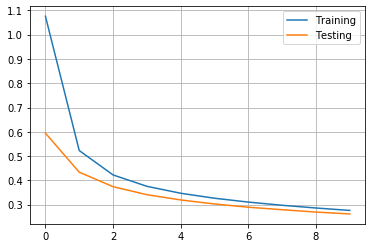

In [5]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

### Confusion matrix

In [6]:
pred = np.argmax(model.predict(X_test), axis=-1)
me.confusion_matrix(y_test, pred)

array([[ 963,    0,    2,    2,    0,    3,    6,    1,    3,    0],
       [   0, 1110,    2,    2,    1,    1,    4,    1,   14,    0],
       [   8,    3,  937,   16,   13,    0,   10,   16,   26,    3],
       [   3,    1,   20,  931,    0,   20,    2,   13,   14,    6],
       [   1,    1,    5,    1,  927,    0,   10,    1,    5,   31],
       [  10,    2,    5,   39,    5,  783,   14,    4,   22,    8],
       [  14,    3,    4,    2,   11,   14,  908,    1,    1,    0],
       [   5,   11,   24,    5,    7,    0,    0,  947,    3,   26],
       [   8,    7,    8,   29,   10,   17,   12,   10,  862,   11],
       [  12,    7,    2,   13,   33,   10,    1,   16,    3,  912]])